# Myntra Fashion Clothing Analysis

# Scenario1

### Task1


In [1]:
#importing relevant packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 

import warnings
warnings.filterwarnings('ignore')

#importing CSV file 

df1=pd.read_csv("C:\\Users\\Laptop-PC\\Desktop\\Myntra Fashion Clothing\\product details.csv",encoding='unicode_escape')
df2=pd.read_csv("C:\\Users\\Laptop-PC\\Desktop\\Myntra Fashion Clothing\\products catalog.csv",encoding='unicode_escape')


df1.head(5)

,ProductID,ProductName,ProductBrand
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx


In [2]:
df2.head(5)

,Gender,Price (INR),NumImages,ID,Description,PrimaryColor
0,Women,593,5,10182131,"Off-White printed woven A-line top, has a rou...",White
1,Men,6396,5,10052169,Display: AnalogueMovement: QuartzPower source:...,Black
2,Women,599,5,10168643,"Blue printed knitted regular top, has a high ...",Blue
3,Men,1034,5,10155427,"Grey and Purple checked smart casual shirt, ha...",Grey
4,Men,477,3,10191059,Beige and Brown striped beltReversible: NoStre...,Brown


In [3]:
# structure of data

print("df1 : {} ".format(df1.shape))
print("df2 : {} ".format(df2.shape))

df1 : (12491, 3) 
df2 : (12491, 6) 


we can see that, we have 3 columns + 12491 rows in 1st dataset and 6 columns + 12491 rows in 2nd dataset

In [4]:
# Basic information of data

print(df1.info())

print("_______________________________________") 

print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     12491 non-null  int64 
 1   ProductName   12491 non-null  object
 2   ProductBrand  12491 non-null  object
dtypes: int64(1), object(2)
memory usage: 292.9+ KB
None
_______________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        12491 non-null  object
 1   Price (INR)   12491 non-null  int64 
 2   NumImages     12491 non-null  int64 
 3   ID            12491 non-null  int64 
 4   Description   12491 non-null  object
 5   PrimaryColor  11597 non-null  object
dtypes: int64(3), object(3)
memory usage: 585.6+ KB
None


we have 1 quantitative & 2 qualitative data from 1st dataset and 3 quantitative & 3 qualitative data from 2nd dataset

In [5]:
# statistics of data / Description of data

print(df1.describe())

print("______________________________________________")

print(df2.describe())


          ProductID
count  1.249100e+04
mean   9.917160e+06
std    1.438006e+06
min    1.012060e+05
25%    1.006215e+07
50%    1.015463e+07
75%    1.021565e+07
max    1.027514e+07
______________________________________________
        Price (INR)     NumImages            ID
count  12491.000000  12491.000000  1.249100e+04
mean    1452.660956      4.913698  9.917160e+06
std     2118.503976      1.092333  1.438006e+06
min       90.000000      1.000000  1.012060e+05
25%      649.000000      5.000000  1.006215e+07
50%      920.000000      5.000000  1.015463e+07
75%     1499.000000      5.000000  1.021565e+07
max    63090.000000     10.000000  1.027514e+07


# Scenario1
# Task2

In [4]:
# Creating new DataFrame by joining the two dataset

df2.rename(columns = {'ID':'ProductID'}, inplace = True)
df= pd.merge(df1, df2, on='ProductID')
df.head(5)

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White


In [5]:
df.shape

(12491, 8)

after joining the two datasets Now, we have total 8 columns with 12491 rows 

In [6]:
#drop the duplicate data

df.duplicated().sum()

0

Before removing duplicate data we have to check that, Is there any duplicate data is available or not. 
we can see that there is no duplicate data in the dataset so we don't need to drop it

In [7]:
#check missing values

df.isnull().sum().sort_values(ascending=False)/len(df)

PrimaryColor    0.071572
ProductID       0.000000
ProductName     0.000000
ProductBrand    0.000000
Gender          0.000000
Price (INR)     0.000000
NumImages       0.000000
Description     0.000000
dtype: float64

we can see that we have null values/missing values in the field of PrimaryColor

# Scenario2

###  1.	There is a column that needs string strip operation. Identify that and apply it.

In [8]:
df_=df.select_dtypes(['object'])
df[df_.columns]=df_.apply(lambda x:x.str.strip())   # str.strip removes the whitespace from the edges
df[df_.columns].head(5)

,ProductName,ProductBrand,Gender,Description,PrimaryColor
0,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,"Black and grey printed medium trolley bag, sec...",Black
1,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,Beige & Grey made to measure kurta with churid...,Beige
2,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,Blue self-design bandhgala suitBlue self-desig...,Blue
4,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,"Brown and off-white printed casual shirt, has ...",White


In [9]:
df.head(5)

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White


As compared to both data frames, we can see that there is a minor change in the column of ProductName and Description 
so these are the two columns that were needed for string strip operation

###  2.	Fill the missing value by ‘Others’ in the column containing it

In [10]:
df['PrimaryColor'].fillna('Others', inplace=True)

In [11]:
df.isnull().sum().sort_values(ascending=False)/len(df)

ProductID       0.0
ProductName     0.0
ProductBrand    0.0
Gender          0.0
Price (INR)     0.0
NumImages       0.0
Description     0.0
PrimaryColor    0.0
dtype: float64

In [12]:
df.shape

(12491, 8)

In [13]:
df['PrimaryColor']

0         Black
1         Beige
2          Pink
3          Blue
4         White
          ...  
12486     Black
12487      Gold
12488      Blue
12489    Others
12490     Black
Name: PrimaryColor, Length: 12491, dtype: object

Null values is replaced from others

###  3.	Since all the column names are single word so you can convert the ‘Price (INR)’ also to single name ‘Price’.

In [14]:
df.rename(columns = {'Price (INR)':'Price'}, inplace = True)

In [15]:
df.head(3)

,ProductID,ProductName,ProductBrand,Gender,Price,NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink


# Scenario3

### Task1

###  1.	Univariate analysis of each variable

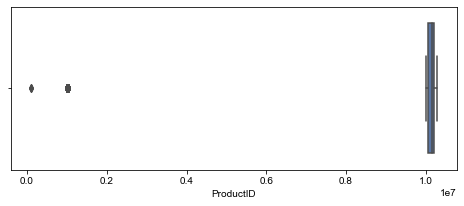

In [19]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(8,3))
sb.set()
sb.boxplot(df['ProductID']);

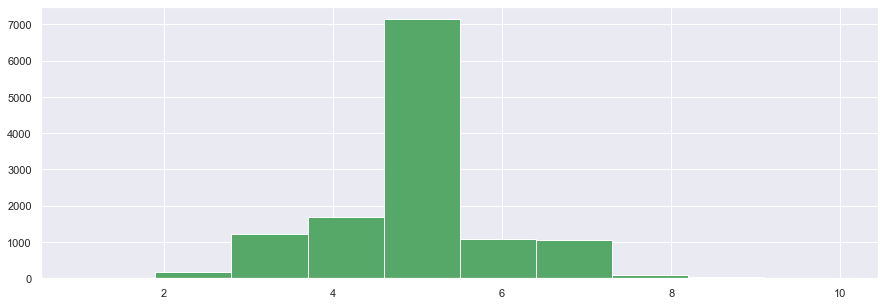

In [20]:
plt.subplots(figsize=(15,5))
sb.set()
plt.hist(df['NumImages'],color='g');

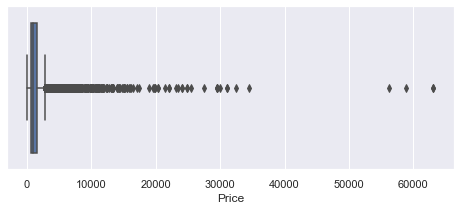

In [21]:
plt.subplots(figsize=(8,3))
sb.set()
sb.boxplot(df['Price']);

In [22]:
#remove outliers

dt=df.drop(df[df['Price']>2100].index, inplace=True)

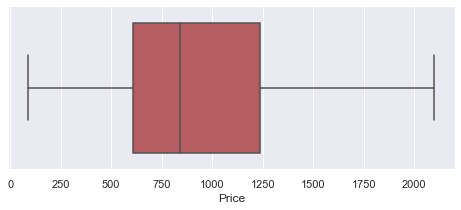

In [23]:
plt.subplots(figsize=(8,3))
sb.set()
sb.boxplot(df['Price'],data=dt,color='r');

<AxesSubplot:xlabel='PrimaryColor', ylabel='count'>

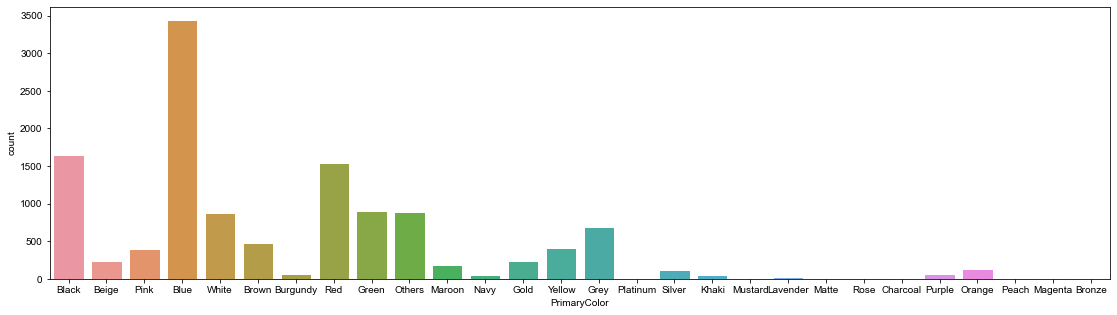

In [16]:
plt.subplots(figsize=(19,5))
sb.set()
sb.countplot(df['PrimaryColor'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

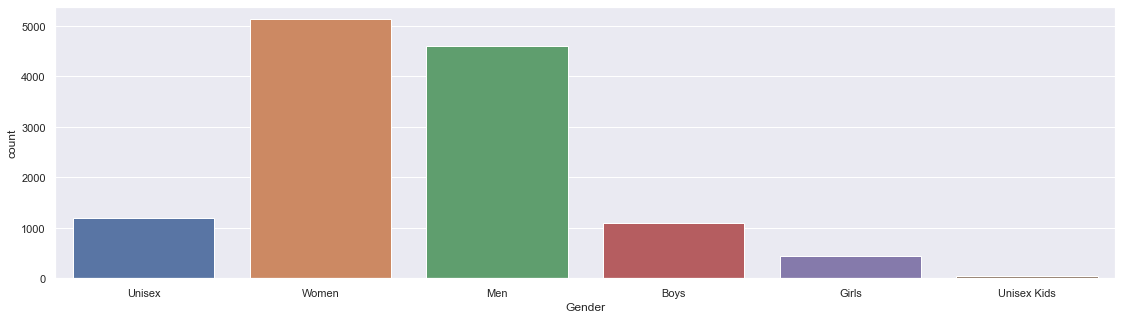

In [17]:
plt.subplots(figsize=(19,5))
sb.set()
sb.countplot(df['Gender'])

###  2.	Bivariate Analysis of categorical vs numerical variables (Take target variable as fixed variable here)

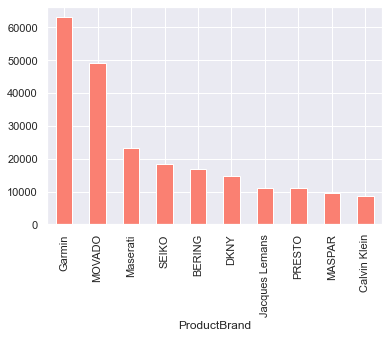

In [18]:
sb.set()
df.groupby('ProductBrand').mean()['Price'].sort_values(ascending = False).head(10).plot(kind='bar',color='salmon');

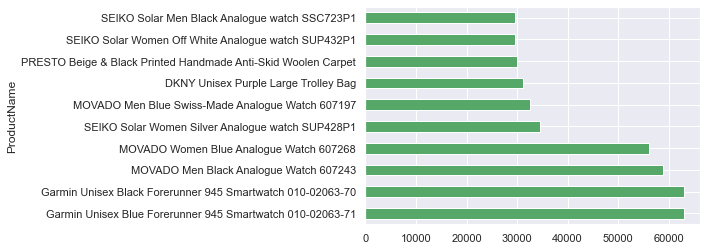

In [19]:
sb.set()
df.groupby('ProductName').mean()['Price'].sort_values(ascending = False).head(10).plot(kind='barh',color='g');

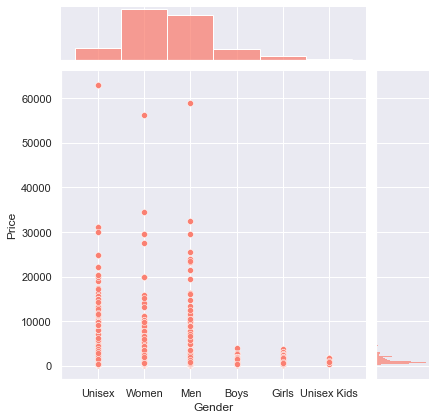

In [20]:
sb.set()
sb.jointplot(y=df["Price"], x=df["Gender"], kind='scatter',height=6,ratio=5,color='salmon')

###  3.	Multivariate Analysis of categorical and numerical variables


In [21]:
data=df.sort_values(by = 'Price', ascending = False).head(10)
data

,ProductID,ProductName,ProductBrand,Gender,Price,NumImages,Description,PrimaryColor
7416,10184209,Garmin Unisex Blue Forerunner 945 Smartwatch 0...,Garmin,Unisex,63090,4,Features:Sync music from select premium stream...,Blue
7465,10184211,Garmin Unisex Black Forerunner 945 Smartwatch ...,Garmin,Unisex,63090,4,Features:Sync music from select premium stream...,Black
1568,10026421,MOVADO Men Black Analogue Watch 607243,MOVADO,Men,58854,3,Display: AnalogueMovement: QuartzPower source:...,Black
1376,10026411,MOVADO Women Blue Analogue Watch 607268,MOVADO,Women,56192,3,Display: AnalogueMovement: QuartzPower source:...,Blue
9400,10223339,SEIKO Solar Women Silver Analogue watch SUP428P1,SEIKO,Women,34500,6,Display: AnalogueMovement: QuartzPower source:...,Silver
1472,10026417,MOVADO Men Blue Swiss-Made Analogue Watch 607197,MOVADO,Men,32532,3,Display: AnalogueMovement: QuartzPower source:...,Blue
470,10017433,DKNY Unisex Purple Large Trolley Bag,DKNY,Unisex,31100,7,"Purple textured large trolley bag, secured wit...",Purple
960,10017461,DKNY Unisex Black & Grey Printed Large Trolley...,DKNY,Unisex,31100,7,"Black textured large trolley bag, secured with...",Black
6102,10163819,PRESTO Beige & Black Printed Handmade Anti-Ski...,PRESTO,Unisex,29998,5,Content: One carpetColour:Beige and black Fabr...,Black
8953,10223353,SEIKO Solar Men Black Analogue watch SSC723P1,SEIKO,Men,29500,6,Display: AnalogueMovement: QuartzPower source:...,Black


<AxesSubplot:xlabel='ProductBrand', ylabel='Price'>

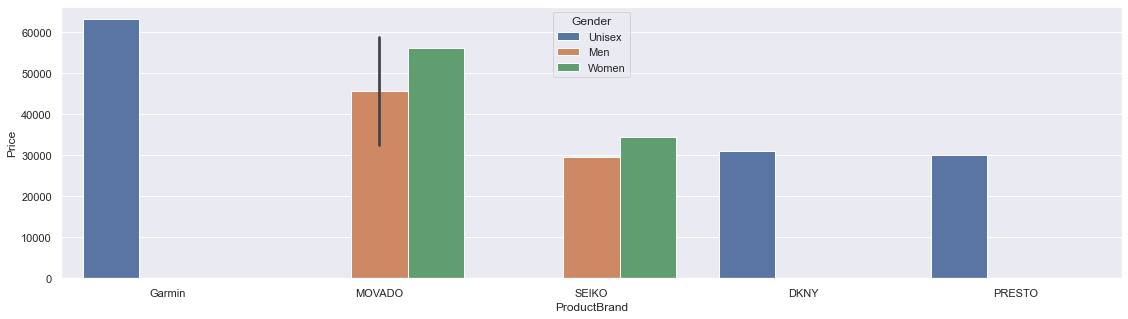

In [22]:
plt.subplots(figsize=(19,5))
sb.set()
sb.barplot(x=data['ProductBrand'],y=data['Price'],hue=data['Gender'])

<AxesSubplot:xlabel='Gender', ylabel='Price'>

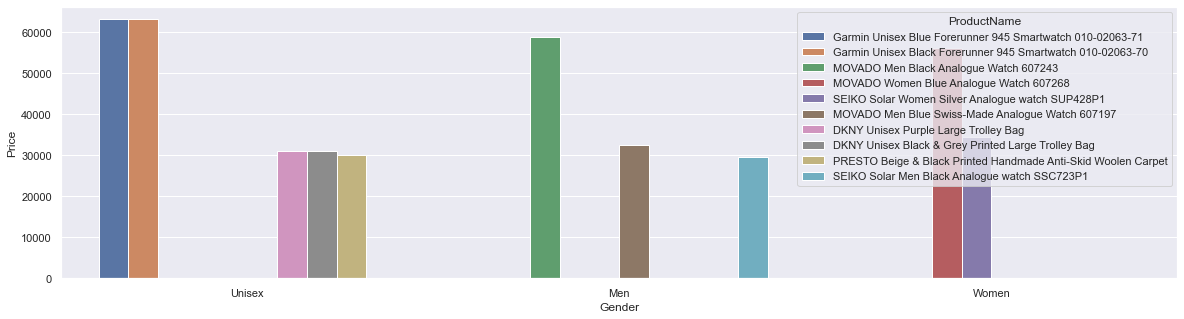

In [23]:
plt.subplots(figsize=(20,5))
sb.set()
sb.barplot(x=data['Gender'],y=data['Price'],hue=data['ProductName'])

###  4.	Check distribution of variables

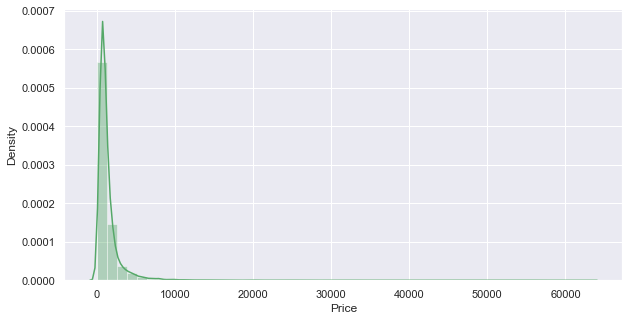

In [24]:
plt.subplots(figsize=(10,5))
sb.set()
sb.distplot(df['Price'],color='g');

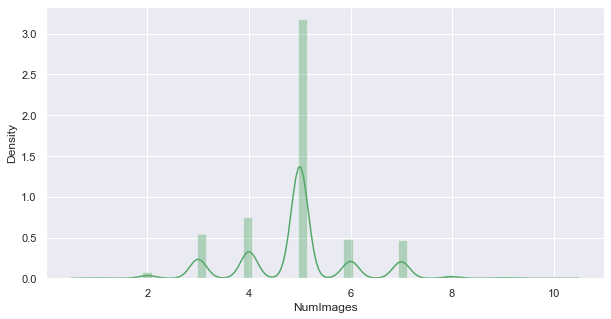

In [25]:
plt.subplots(figsize=(10,5))
sb.set()
sb.distplot(df['NumImages'],color='g');

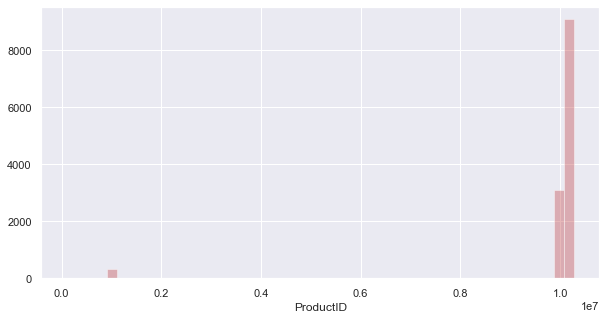

In [26]:
plt.subplots(figsize=(10,5))
sb.set()
sb.distplot(df['ProductID'],kde=False,color='r');

### Task2
#### 1.	Create a new Column “NewGender” to analyse further its distribution. Going forward we will consider this group for tasks
#### Logic Applied
#### i.	Include Boys & Men as Men
#### ii.	Include Girls & Women as Women
#### iii.	Include Unisex & Unisex Kids as Unisex

In [27]:
df['NewGender'] = df[df['Gender'] != 'NaN']['Gender']

In [28]:
df['NewGender'].unique()

array(['Unisex', 'Women', 'Men', 'Boys', 'Girls', 'Unisex Kids'],
      dtype=object)

In [29]:
data1=df.replace({'NewGender':{'Boys' : 'Men', 'Girls' : 'Women','Unisex Kids':'Unisex' }})

In [30]:
data1['NewGender'].unique()

array(['Unisex', 'Women', 'Men'], dtype=object)

###  2.	Complete the analysis of NewGender along with other categorical cols.

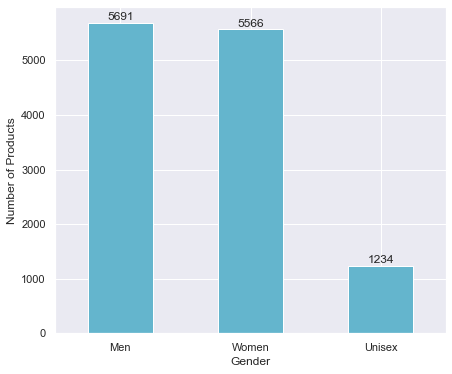

In [31]:
gender = data1['NewGender'].value_counts()
plt.figure(figsize=(7, 6))
ax = gender.plot(kind='bar', rot=0, color="c")
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Products')
ax.set_xticklabels(('Men', 'Women','Unisex'))

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()

we can see that there is a 5691 No.of product buys by mens,5566 No.of product buys by womens and 1234 No.of product buys by Unisex
there is a very minor difference between men and women but Unisex spends less time on products

### Task3
#### 1.	Create a new Column “DescriptionLength” to analyse further its distribution.
#### Logic Applied
#### i.	Each record of DescriptionLength is equal to the number of chars in Description

In [32]:
df['DescriptionLength'] =(df['Description']).str.len()


In [33]:
df['DescriptionLength']

0        401
1        622
2        133
3        340
4        122
        ... 
12486    280
12487    210
12488     84
12489     50
12490    186
Name: DescriptionLength, Length: 12491, dtype: int64

In [34]:
df.head(3)

,ProductID,ProductName,ProductBrand,Gender,Price,NumImages,Description,PrimaryColor,NewGender,DescriptionLength
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black,Unisex,401
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige,Women,622
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink,Women,133


###  2.	Complete the analysis of DescriptionLength along with other categorical cols.

In [35]:
dataf=df.sort_values(by = 'Price', ascending = False).head(10)
dataf

,ProductID,ProductName,ProductBrand,Gender,Price,NumImages,Description,PrimaryColor,NewGender,DescriptionLength
7416,10184209,Garmin Unisex Blue Forerunner 945 Smartwatch 0...,Garmin,Unisex,63090,4,Features:Sync music from select premium stream...,Blue,Unisex,954
7465,10184211,Garmin Unisex Black Forerunner 945 Smartwatch ...,Garmin,Unisex,63090,4,Features:Sync music from select premium stream...,Black,Unisex,954
1568,10026421,MOVADO Men Black Analogue Watch 607243,MOVADO,Men,58854,3,Display: AnalogueMovement: QuartzPower source:...,Black,Men,317
1376,10026411,MOVADO Women Blue Analogue Watch 607268,MOVADO,Women,56192,3,Display: AnalogueMovement: QuartzPower source:...,Blue,Women,308
9400,10223339,SEIKO Solar Women Silver Analogue watch SUP428P1,SEIKO,Women,34500,6,Display: AnalogueMovement: QuartzPower source:...,Silver,Women,466
1472,10026417,MOVADO Men Blue Swiss-Made Analogue Watch 607197,MOVADO,Men,32532,3,Display: AnalogueMovement: QuartzPower source:...,Blue,Men,290
470,10017433,DKNY Unisex Purple Large Trolley Bag,DKNY,Unisex,31100,7,"Purple textured large trolley bag, secured wit...",Purple,Unisex,356
960,10017461,DKNY Unisex Black & Grey Printed Large Trolley...,DKNY,Unisex,31100,7,"Black textured large trolley bag, secured with...",Black,Unisex,355
6102,10163819,PRESTO Beige & Black Printed Handmade Anti-Ski...,PRESTO,Unisex,29998,5,Content: One carpetColour:Beige and black Fabr...,Black,Unisex,88
8953,10223353,SEIKO Solar Men Black Analogue watch SSC723P1,SEIKO,Men,29500,6,Display: AnalogueMovement: QuartzPower source:...,Black,Men,478


<AxesSubplot:xlabel='ProductBrand', ylabel='DescriptionLength'>

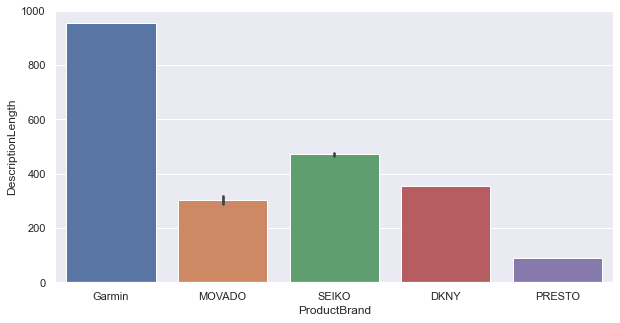

In [36]:
plt.subplots(figsize=(10,5))
sb.set()
sb.barplot(x=dataf['ProductBrand'],y=dataf['DescriptionLength'])

we can see that these are top 5 product brands where Garmin has highest Description length

###  3.	Isn’t it important to check if attribute information is also included in Description? 

Can't say it is important or not but yes if it is present in the data then it's good for us for better understanding about the product and data.
Because attribute information displays all the details about the attribute, including the attribute properties, default values, attribute visibility,
and any constraints on the attribute, And attribute is a specification that defines a property of an object & element.

